They are most useful when we have insufficient information about the distribution of the data, are uncomfortable making assumptions about the distribution, or if the distribution of the test statistic is not easily computed.
http://www.biostat.ucsf.edu/sen/statgen14/permutation-tests.html

If we shuffle the data randomly and assign them to groups, then we will destroy any association between the data and the group (the null hypothesis). Therefore, the distribution of the test statistic obtained from repeated random shuffling, can be used to approximate the null distribution of the test statistic.

A permutation test is guaranteed to have the correct desired false positive rate (Type I error) regardless of the distributional characteristics of the data at hand. This flexibility comes at the cost of increased computational complexity.

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import sklearn as sk
import scipy.stats.stats as st
%matplotlib inline
import random

NORMAL DISTRIBUTIONS HOMOSCEDASTIC

In [3]:
x

array([ 1.2411367 ,  0.68457077,  1.90557306,  2.20476764,  0.13805967,
        0.9665966 , -0.440937  , -0.64212586,  0.4719096 , -0.2880221 ])

In [4]:
y

array([-0.01432483, -1.85649839,  1.04748225,  1.30222469,  0.32667053,
       -1.51832415,  0.09758566,  0.54132723, -0.06339234,  1.61838937,
       -0.68252644,  0.67516181,  1.51195619, -0.36669032,  1.90662893,
        0.87168262,  1.47025571,  0.35794725, -2.72618668, -0.6185851 ,
        0.10391688, -0.119186  ,  1.03156811,  0.30485315,  1.14455575,
        1.29575271, -0.44486134,  0.41905563,  0.54041733,  0.51590034,
       -1.15375714, -0.54569583, -1.31122903,  1.61142172,  0.56036046,
        0.17669566, -0.83249768,  1.98645348,  0.63409855,  1.95302847,
        1.93760148,  0.5276784 , -0.86218205,  2.37350124, -1.56707616,
        0.94375265, -0.71309133,  1.38212932, -1.50069328,  0.20293484])

In [2]:
#Example to start with, two samples from a normal distribution
# and test whether the mean is larger than 1000 shuffles of the 2 samples 
x=np.random.normal(size=10)
y=np.random.normal(size=50)
delta=abs(np.mean(x)-np.mean(y))

In [5]:
delta

0.33462910385358585

In [6]:
delta_sh=np.zeros(1000)

z=np.concatenate([x,y])
for i in range(1000):
    random.shuffle(z)
    delta_sh[i]=np.mean(z[:10])-np.mean(z[10:])
p_perm=np.mean((delta_sh>delta) | (delta_sh<-delta))


p(perm test) = 0.377
p(t-test) = 0.390869257911


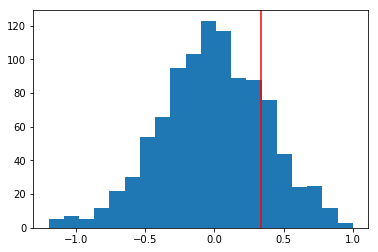

In [9]:
#This is the null distribution of the test statistic that we can use to assess 
# the unlikeliness of our observed statistic.
plt.hist(delta_sh, 20);
print('p(perm test) = ' + str(p_perm))

plt.axvline(delta,color='red')

p_value=stats.ttest_ind(x,y).pvalue
print('p(t-test) = ' + str(p_value))

Now we compute the distribution of the p-values with a permutation test when the null hypothesis is true.

In [44]:
#We generate 1000 times two samples from a normal distribution
# and test whether the mean is larger than 1000 shuffles of the 2 samples 
p_perm=np.zeros(1000)
p_value=[]

for k in range(1000):
    x=np.random.normal(size=10)
    y=np.random.normal(size=50)
    delta=abs(np.mean(x)-np.mean(y))
    z=np.concatenate([x,y])
    delta_sh=np.zeros(1000)
    for i in range(1000):
        random.shuffle(z)
        delta_sh[i]=abs(np.mean(z[:10])-np.mean(z[10:]))
    p_perm[k]=np.mean(delta<delta_sh)
    p_value.append(stats.ttest_ind(x,y).pvalue)
    if k%100==0:
        print(k,end=',')

0,100,200,300,400,500,600,700,800,900,

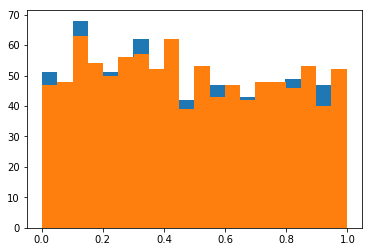

In [45]:
plt.hist(p_perm,20, alpha=0.9);
plt.hist(p_value,20, alpha=0.9);

In [47]:
'type-I error rate = {:.3f}'.format(np.mean(p_perm<0.05))

'type-I error rate = 0.048'

Then we compute the distribution of the p-values with a permutation test when the alternative hypothesis is true.

In [48]:
#We generate 1000 times two samples from normal distribution with a mean difference of 0.5
# and test whether the mean is larger than 1000 shuffles of the 2 samples 
p_permb=np.zeros(1000)
p_valueb=[]


for k in range(1000):
    x=np.random.normal(size=10)
    y=np.random.normal(size=50)+0.5
    delta=abs(np.mean(x)-np.mean(y))
    z=np.concatenate([x,y])
    delta_sh=np.zeros(1000)
    for i in range(1000):
        random.shuffle(z)
        delta_sh[i]=abs(np.mean(z[:10])-np.mean(z[50:]))
    p_permb[k]=np.mean(delta<delta_sh)
    p_valueb.append(stats.ttest_ind(x,y).pvalue)

    if k%100==0:
        print(k,end=',')

0,100,200,300,400,500,600,700,800,900,

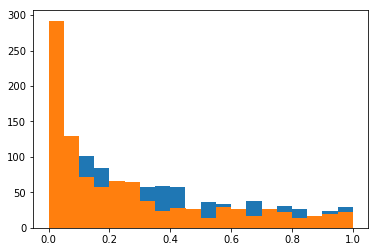

In [49]:
plt.hist(p_permb,20);
plt.hist(p_valueb,20);

In [50]:
print('power = ', str(np.mean(p_perm<0.05)))

power =  0.048


We do the same for heteroscedastic distributions (we fail the criterion of exchangeability).

In [51]:
#Now let's see for heteroscedastic distribution. We will see 
# that the permutation test fails pretty much like the t-test
#Why? because the criterion of exchangeability is not met!
p_perm_het=np.zeros(1000)
p_value_het=[]

for k in range(1000):
    x=np.random.normal(size=10)
    y=5*np.random.normal(size=50)
    delta=abs(np.mean(x)-np.mean(y))
    z=np.concatenate([x,y])
    delta_sh=np.zeros(1000)
    for i in range(1000):
        random.shuffle(z)
        delta_sh[i]=abs(np.mean(z[:10])-np.mean(z[50:]))
    p_perm_het[k]=np.mean(delta<delta_sh)
    p_value_het.append(stats.ttest_ind(x,y).pvalue)
    
    if k%100==0:
        print(k,end=',')

0,100,200,300,400,500,600,700,800,900,

Permutation: 0.0
t-test: 0.0


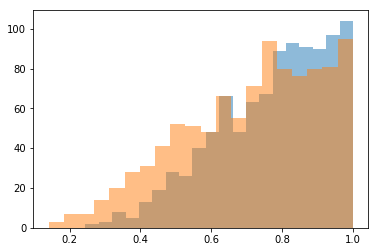

In [52]:
plt.hist(p_perm_het,20,alpha=0.5);
plt.hist(p_value_het,20,alpha=0.5);
print('Permutation:',np.mean(p_perm_het<0.05))
print('t-test:',np.mean(pd.Series(p_value_het)<0.05))

In [53]:
#Now let's compute the power for heteroscedastic distributions
p_perm_hetb=np.zeros(1000)
p_value_hetb=[]

for k in range(1000):
    x=np.random.normal(size=10)
    y=5*np.random.normal(size=50)+2
    delta=abs(np.mean(x)-np.mean(y))
    z=np.concatenate([x,y])
    delta_sh=np.zeros(1000)
    for i in range(1000):
        random.shuffle(z)
        delta_sh[i]=abs(np.mean(z[:10])-np.mean(z[50:]))
    p_perm_hetb[k]=np.mean(delta<delta_sh)
    p_value_hetb.append(stats.ttest_ind(x,y).pvalue)
    
    if k%100==0:
        print(k,end=',')

0,100,200,300,400,500,600,700,800,900,

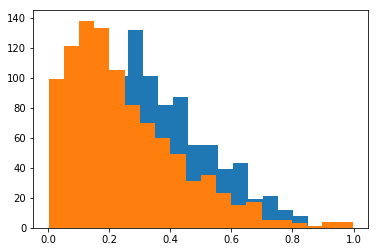

In [54]:
plt.hist(p_perm_hetb,20);
plt.hist(p_value_hetb,20);

Non-normal distribution

In [11]:
x=np.random.gamma(1,10,size=100000)

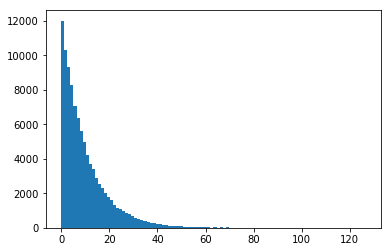

In [13]:
plt.hist(x,100);

In [55]:
#Now let's see for non-normal distribution
p_perm_gamma=np.zeros(1000)
p_value_gamma=[]

for k in range(1000):
    x=np.random.gamma(1,10,size=10)
    y=np.random.gamma(1,10,size=10)

    delta=abs(np.mean(x)-np.mean(y))
    z=np.concatenate([x,y])
    
    delta_sh=np.zeros(1000)
    for i in range(1000):
        random.shuffle(z)
        delta_sh[i]=abs(np.mean(z[:10])-np.mean(z[10:]))
        
    p_perm_gamma[k]=np.mean(delta<delta_sh)
    p_value_gamma.append(stats.ttest_ind(x,y).pvalue)
    
    if k%100==0:
        print(k,end=',')

0,100,200,300,400,500,600,700,800,900,

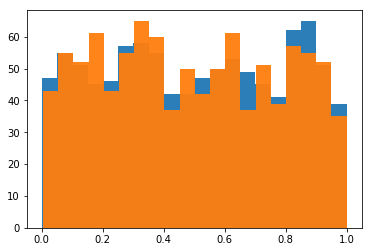

In [56]:
plt.hist(p_perm_gamma,20, alpha=0.95);
plt.hist(p_value_gamma,20, alpha=0.95);

Skewness test

In [57]:
x=np.random.normal(size=20)
y=np.random.normal(size=20)
delta=st.skew(x)-st.skew(y)
z=np.concatenate([x,y])
delta_sh=np.zeros(1000)
for i in range(1000):
    random.shuffle(z)
    delta_sh[i]=st.skew(z[:20])-st.skew(z[20:])

effect = 0.3252215501049172 and p-value = 0.564


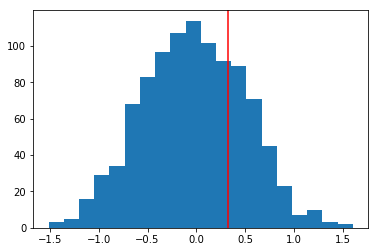

In [58]:
plt.hist(delta_sh, 20);
plt.axvline(delta,color='red')
print('effect = ' + str(delta) + ' and p-value = ' + 
      str(np.mean((delta_sh>abs(delta)) | (delta_sh<-abs(delta)))))

In [87]:
p_perm_skew=np.zeros(1000)

for k in range(1000):
    x=np.random.normal(size=20)
    y=np.random.normal(size=20)
    delta=abs(st.skew(x)-st.skew(y))
    z=np.concatenate([x,y])
    delta_sh=np.zeros(1000)
    for i in range(1000):
        random.shuffle(z)
        delta_sh[i]=abs(st.skew(z[:20])-st.skew(z[20:]))
    p_perm_skew[k]=np.mean(delta<delta_sh)

    if k%10==0:
        print(k,end=',')

0,10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170,180,190,200,210,220,230,240,250,260,270,280,290,300,310,320,330,340,350,360,370,380,390,400,410,420,430,440,450,460,470,480,490,500,510,520,530,540,550,560,570,580,590,600,610,620,630,640,650,660,670,680,690,700,710,720,730,740,750,760,770,780,790,800,810,820,830,840,850,860,870,880,890,900,910,920,930,940,950,960,970,980,990,

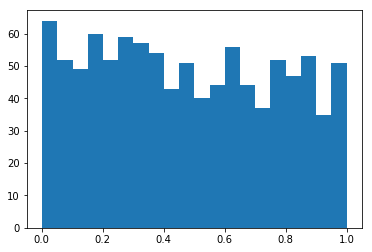

In [88]:
plt.hist(p_perm_skew,20);

In [83]:
x=np.random.normal(size=20)
y=np.random.gamma(1,10,size=20)
y=(y-np.mean(y))/np.std(y)
delta=abs(st.skew(x)-st.skew(y))
z=np.concatenate([x,y])
delta_sh=np.zeros(50000)
for i in range(50000):
    random.shuffle(z)
    delta_sh[i]=st.skew(z[:20])-st.skew(z[20:])

effect = 2.4503863054445376 and p-value = 0.02598


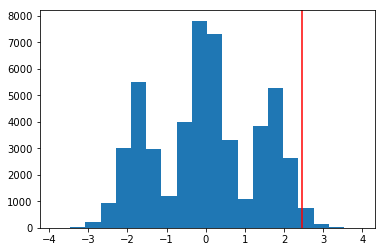

In [84]:
plt.hist(delta_sh, 20);
plt.axvline(delta,color='red')
print('effect = ' + str(delta) + ' and p-value = ' + 
      str(np.mean((delta_sh>delta) | (delta_sh<-delta))))

In [85]:
p_perm_skewb=np.zeros(1000)

for k in range(1000):
    x=np.random.normal(size=20)
    y=np.random.gamma(1,10,size=20)
    y=(y-np.mean(y))/np.std(y)
    delta=abs(st.skew(x)-st.skew(y))
    z=np.concatenate([x,y])
    delta_sh=np.zeros(1000)
    for i in range(1000):
        random.shuffle(z)
        delta_sh[i]=abs(st.skew(z[:20])-st.skew(z[20:]))
    p_perm_skewb[k]=np.mean(delta<delta_sh)

    if k%10==0:
        print(k,end=',')

0,10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170,180,190,200,210,220,230,240,250,260,270,280,290,300,310,320,330,340,350,360,370,380,390,400,410,420,430,440,450,460,470,480,490,500,510,520,530,540,550,560,570,580,590,600,610,620,630,640,650,660,670,680,690,700,710,720,730,740,750,760,770,780,790,800,810,820,830,840,850,860,870,880,890,900,910,920,930,940,950,960,970,980,990,

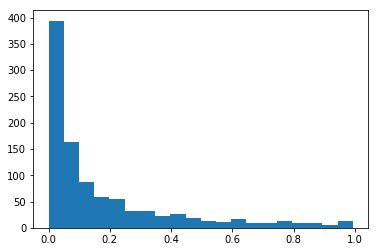

In [86]:
plt.hist(p_perm_skewb,20);